# Three-pointers in the NBA

### Used Dataset: "NBA Players stats since 1950"

<br><br>

Of a time to this part some people has been arguing about NBA and the role three-pointers are playing in the game. Some are asking for moving back the three point line while others are requesting a new 4-point line.

Is the game too much 3-point centric?
Is becoming too easy for the players score from the three point line?


<p style="font-family: Arial; font-size:1.75em;color:purple; font-style:bold"><br>
Import Libraries<br><br></p>

In [28]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [29]:
#fonts for plotting
font = {'family' : 'DejaVu Sans',
        'weight' : 'bold',
        'size'   : 22}

plt.rc('font', **font)

<p style="font-family: Arial; font-size:1.75em;color:purple; font-style:bold"><br>
Read Data from the CSV into pandas <br><br></p>

In [30]:
# Reading csv file to a dataframe
stats = pd.read_csv('./data/Seasons_Stats.csv')

<p style="font-family: Arial; font-size:1.75em;color:purple; font-style:bold"><br>
Analyzing data
<br><br></p>

In [31]:
# Selecting several features
features = ['Year','Pos','Tm','G','GS','MP','PER','TS%','3PAr','FTr','FG','FGA','FG%','3P','3PA','3P%',
            '2P','2PA','2P%','eFG%','FT','FTA','FT%']

The data-set used contains the players’ stats from 1950. However the threepoint line was introduced in the NBA in the season 1979-1980. Besides, the data for the first two seasons are clearly outliers therefore the study is focused in the seasons later than 1982.

In [32]:
# Cleaning the data
cases = stats[features].dropna()
cases.shape

(14585, 23)

The three-point line was introduced in the NBA in the season 1979-1980.<br><br>

In [33]:
cases.head()

,Year,Pos,Tm,G,GS,MP,PER,TS%,3PAr,FTr,...,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%
5730,1980.0,PG,BOS,80.0,80.0,2864.0,15.3,0.574,0.023,0.548,...,4.0,18.0,0.222,379.0,776.0,0.488,0.485,361.0,435.0,0.830
5748,1980.0,PF,BOS,82.0,82.0,2955.0,20.5,0.538,0.098,0.246,...,58.0,143.0,0.406,635.0,1320.0,0.481,0.494,301.0,360.0,0.836
5781,1980.0,SF,BOS,82.0,7.0,1994.0,14.6,0.526,0.054,0.316,...,12.0,41.0,0.293,350.0,722.0,0.485,0.482,178.0,241.0,0.739
5786,1980.0,SG,BOS,60.0,0.0,523.0,7.8,0.402,0.032,0.222,...,1.0,6.0,0.167,66.0,183.0,0.361,0.357,32.0,42.0,0.762
5802,1980.0,C,BOS,66.0,55.0,2159.0,14.8,0.477,0.013,0.131,...,1.0,12.0,0.083,421.0,920.0,0.458,0.453,95.0,122.0,0.779


Let's take a look on the evolution of the 3-point goal attempted (3PA) compared with the overall field goals attempted (FGA).<br><br>

In [34]:
def plotting(data, title, title_y=None):
    '''
    Plots the data with the given title.
    
    Parameters:
    data: Pandas dataset or dataseries 
    title: Plot title
    title_y: [Optional] Y label title
    
    Returns: None
    
    '''
    
    ax = data.plot(figsize = (15,7), title=title)
    if title_y is not None:
        ax.set_ylabel(title_y)

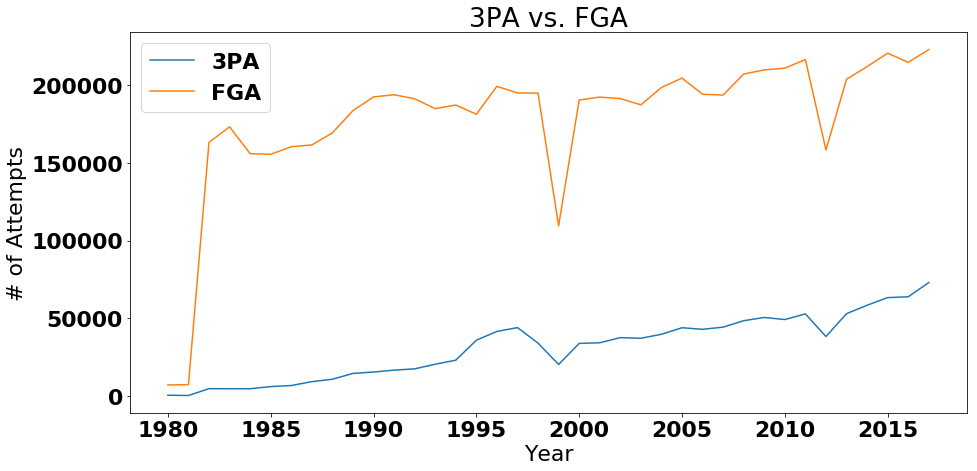

In [35]:
y3PA = cases[['Year','3PA']].groupby('Year').sum()
y3PA['FGA'] = cases[['Year','FGA']].groupby('Year').sum()

plotting(y3PA, title='3PA vs. FGA', title_y="# of Attempts")

The number of field goals attempted for the first two seasons are strangely smaller than the following years so we are going to leave those seasons out.<br><br>

In [36]:
f = cases['Year'] > 1982
cases = cases[f]
cases.shape

(14270, 23)

In [37]:
cases.head()

,Year,Pos,Tm,G,GS,MP,PER,TS%,3PAr,FTr,...,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%
6823,1983.0,C,LAL,79.0,79.0,2554.0,23.6,0.619,0.002,0.302,...,0.0,2.0,0.000,722.0,1226.0,0.589,0.588,278.0,371.0,0.749
6824,1983.0,C,PHO,80.0,75.0,2447.0,16.8,0.527,0.003,0.221,...,1.0,3.0,0.333,476.0,978.0,0.487,0.487,180.0,217.0,0.829
6825,1983.0,SF,DAL,81.0,75.0,2784.0,20.5,0.535,0.048,0.371,...,16.0,76.0,0.211,751.0,1513.0,0.496,0.488,429.0,589.0,0.728
6826,1983.0,SG,BOS,80.0,76.0,2048.0,13.2,0.519,0.040,0.135,...,5.0,29.0,0.172,352.0,691.0,0.509,0.499,72.0,97.0,0.742
6828,1983.0,SF,TOT,65.0,2.0,1202.0,13.7,0.526,0.011,0.462,...,0.0,4.0,0.000,190.0,375.0,0.507,0.501,100.0,175.0,0.571


Let's see again the evolution of the 3-point goal attempted (3PA) compared with the overall field goals attempted (FGA).<br><br>

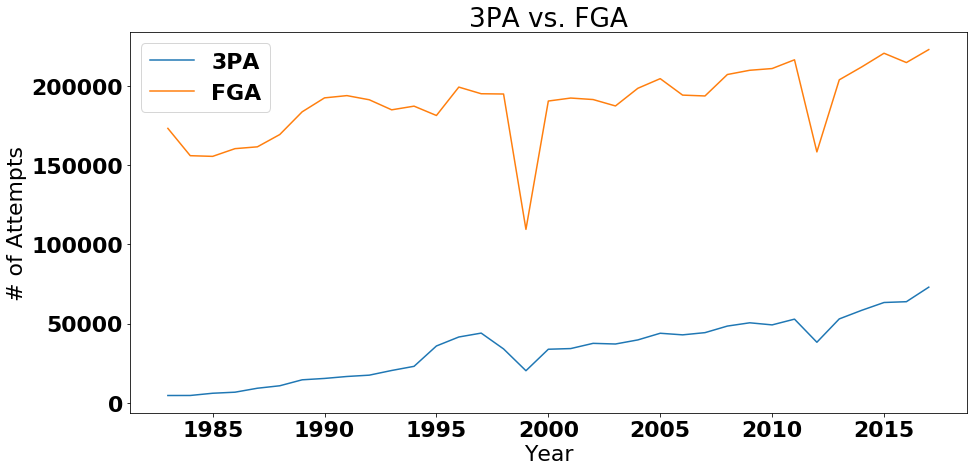

In [38]:
y3PA = cases[['Year','3PA']].groupby('Year').sum()
y3PA['FGA'] = cases[['Year','FGA']].groupby('Year').sum()

plotting(y3PA, title='3PA vs. FGA', title_y="# of Attempts")

In the figure above we can see how the number of attempts goes down by the years of lockout. It is also visible an increment of 3-point attempts (the blue line) during the years the league has shortened the line distance. 
<br><br>
As the time goes by both, the overall attempts and the 3-pointers has been increasing in number but this increment seems to be higher in the later ones.
<br><br>

In [39]:
y3PA.tail()

,3PA,FGA
Year,,
2013.0,52922.0,203802.0
2014.0,58332.0,211923.0
2015.0,63276.0,220584.0
2016.0,63783.0,214707.0
2017.0,72957.0,222897.0


Let's see which percentage of the overall field goal attempts were made from beyond the line.
<br><br>

In [40]:
y3PA['%3P'] = y3PA['3PA'] / y3PA['FGA']
y3PA.tail()

,3PA,FGA,%3P
Year,,,
2013.0,52922.0,203802.0,0.259674
2014.0,58332.0,211923.0,0.275251
2015.0,63276.0,220584.0,0.286857
2016.0,63783.0,214707.0,0.297070
2017.0,72957.0,222897.0,0.327313


The percentage of 3-pointers attempted has been growing quickly last years. Last season 1/3 of the FGA was a 3-pointer.
<br><br>

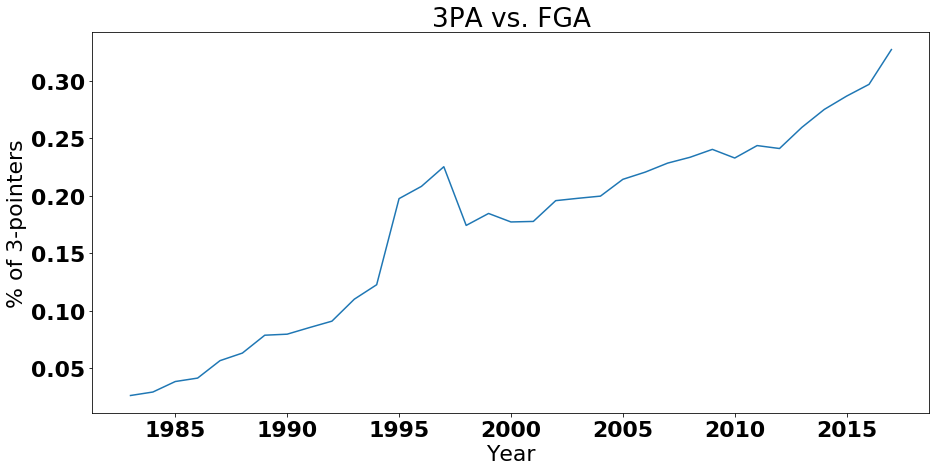

In [41]:
plotting(y3PA['%3P'], title='3PA vs. FGA', title_y="% of 3-pointers")

<br><br>
Let's plot the trend
<br><br>

In [42]:
def plotting_trend(x, y):
    '''
    Plots the data with the trendline.
    
    Parameters:
    x: x values
    y: y label
    
    Returns: None    
    '''
    
    plt.figure(figsize=(15,7))
    plt.plot(x,y,'')

    # calc the trendline
    z = np.polyfit(x, y, 1)
    p = np.poly1d(z)
    l = plt.plot(x,p(x),"r-")

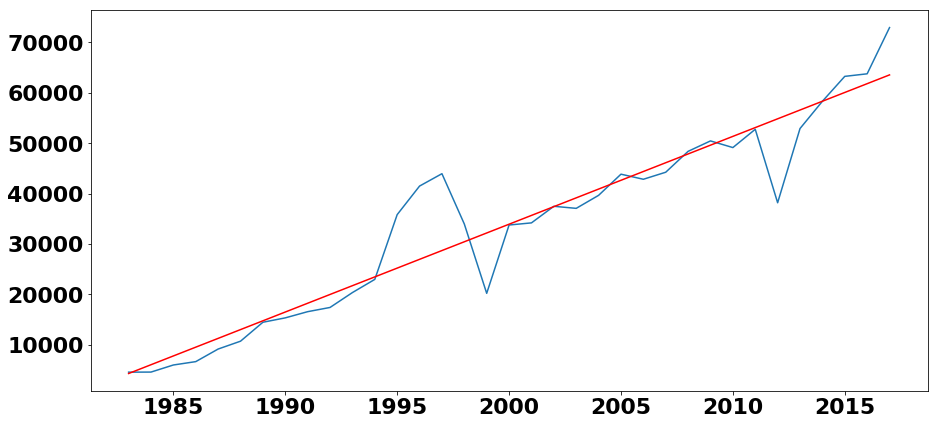

In [43]:
y = y3PA['3PA']
x = y3PA.index

plotting_trend(x, y)

<br><br><br><br>
And now let's do the same with the 2-point attempts
<br><br>

In [45]:
y2PA = cases[['Year','2PA']].groupby('Year').sum()
y2PA['FGA'] = cases[['Year','FGA']].groupby('Year').sum()

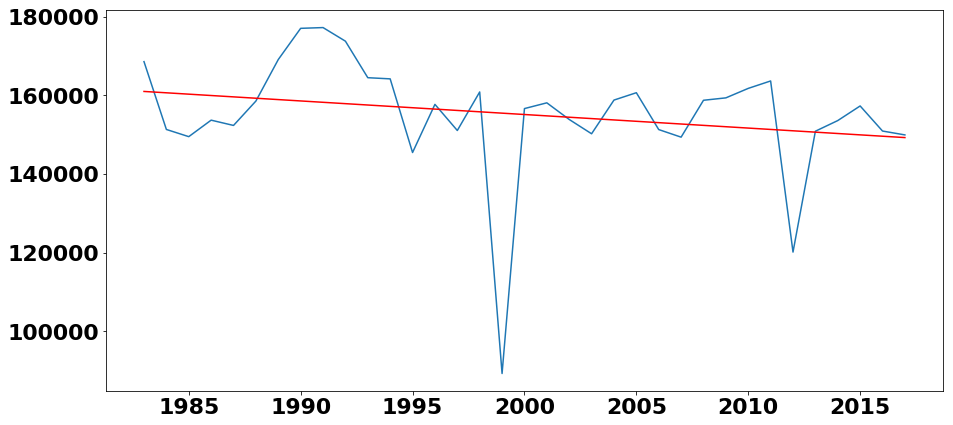

In [46]:
y = y2PA['2PA']
x = y2PA.index

plotting_trend(x, y)

<br><br><br><br>
It is true that lately the players have been shooting more 3-pointers than ever and at the same time the 2-point shoots have decreased.
<br><br>
Let's see the correlation:
<br><br>

In [47]:
y3PA['2PA'] = y2PA['2PA']
y3PA[['3PA', '2PA']].corr()

,3PA,2PA
3PA,1.000000,-0.103589
2PA,-0.103589,1.000000


<br><br>
So players tend to shoot more and more from the three point line but it is worth?<br>
Let's analyze the percentage of success for both 2 and 3 point attempts.
<br><br>

In [48]:
yP = cases[['Year','3P%']].groupby('Year').mean()
yP['2P%'] = cases[['Year','2P%']].groupby('Year').mean()

In [49]:
yP.describe()

,3P%,2P%
count,35.000000,35.000000
mean,0.246789,0.461860
std,0.044516,0.012469
min,0.138166,0.436555
25%,0.214296,0.452676
50%,0.267942,0.463524
75%,0.277171,0.471451
max,0.304354,0.483330


The accuracy of the 3-pointers has also increased with time but, in average, is still far from the 2-point field goals.
<br><br>

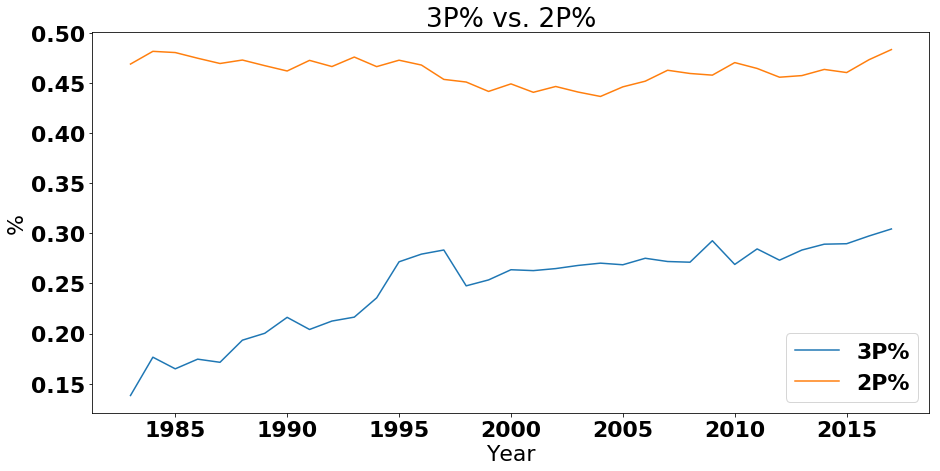

In [50]:
plotting(yP, title='3P% vs. 2P%', title_y="%")

# Conclusions
## Is the game too much 3-point centric?

* ### According to the analysis one third of the current field goal attempts are made beyond of the three-point line. It is too much? That is not clear. We would need other information as the number of possessions per game or how long those possessions last.

## Is becoming too easy for the players score from the three point line?

* ### It is a matter of fact that players are shooting more and with better percentages than ever but the lever of success is still far from the two point shoots.